Enter picture name: Lenna.png
0  -  All
1  -  Brighten
2  -  Contrast
3  -  Flip
4  -  Grey
5  -  Overlap
6  -  Blur
Choose options: 3
0 - Flip Vertically
1 - Flip Horizontally
Choose options: 0
Image's size:  (512, 512, 3)
Option:  3 - Flip


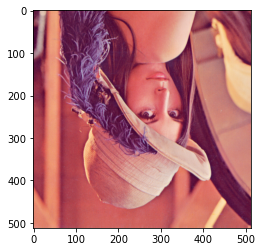

In [2]:
'''
Name: Lai Minh Thong
Student ID: 20127635

Image Processing
'''

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt



def brightenImage(image, scale = 0.3):
    image = image.astype(int)
    
    #increase image with a predefined scale
    image += int(scale*255)
    image[image > 255] = 255
    
    image = image.astype(np.uint8)
    return image

def contrastImage(image, scale = 0.3):
    image = image.astype(float)
    
    #scale domain of RGB values from 0->255 to -0.5->0.5
    image = image/255 - 0.5
    
    image *= float(1 + scale)**2
    
    #scale domain of RGB values back
    image = (image + 0.5) * 255
    
    image[image > 255] = 255
    image[image < 0] = 0
    
    image = image.astype(np.uint8)
    return image

def flipImage(image, dim, mode):
    image = image.reshape(dim)
    
    image = np.flip(image, mode)
    
    image = image.flatten()
    return image

def greyImage(image, alpha = 0.299, beta = 0.587, gamma = 0.114):
    image = image.astype(float)
    
    image = np.dot(image, np.array([alpha, beta, gamma])/(alpha + beta + gamma))
    image = (image*np.ones((3,1))).transpose()
    
    image = image.astype(np.uint8)
    return image

def overlapImage(image1, image2, alpha = 1, beta = 1):
    image1 = image1.astype(float)
    image2 = image2.astype(float)
    
    image = (image1*alpha + image2*beta)/(alpha + beta)
    
    image = image.astype(np.uint8)
    return image

def blurImage(image, dim, kernel):
    image = image.reshape(dim)
    image_result = np.zeros(image.shape)
    
    kernelDim = kernel.shape[0]
    for i in range(kernelDim):
        for j in range(kernelDim):
            rowShiftValue = int(i - kernelDim/2)
            colShiftValue = int(j - kernelDim/2)
            shiftedArray = np.roll(image, (rowShiftValue, colShiftValue), axis=(0, 1))
            image_result += shiftedArray * kernel[i,j]
        
    image_result = image_result.flatten()
    
    image_result = image_result.astype(np.uint8)
    return image_result



def save_image(opt, imName, image):
    image = Image.fromarray(image)
      
    if opt == 1:
        image.save(imName[:-4] + "_brighten" + imName[-4:])
    elif opt == 2:
        image.save(imName[:-4] + "_contrast" + imName[-4:])
    elif opt == 3:
        image.save(imName[:-4] + "_flip" + imName[-4:])
    elif opt == 4:
        image.save(imName[:-4] + "_grey" + imName[-4:])
    elif opt == 5:
        image.save(imName[:-4] + "_overlap" + imName[-4:])
    elif opt == 6:
        image.save(imName[:-4] + "_blur" + imName[-4:])

def show_image(optIndex, converted_image, Options):
    print("Image's size: ", converted_image.shape)
    print("Option: ", optIndex, "-", Options[optIndex])
    plt.imshow(converted_image)
    plt.show()
    
def generate_image(optIndex, image):
    #Convert into np.array
    image = np.array(image)
    dim = image.shape
    
    #Flatten image into 1d and reshape into an array of pixels elements
    image = image.flatten()
    image = image.reshape(int(image.shape[0]/3), 3)
    
    
    #Brighten    
    if optIndex == 1: 
        converted_image = brightenImage(image)
        
    #Contrast
    elif optIndex == 2:
        converted_image = contrastImage(image)
        
    #Flip
    elif optIndex == 3:
        mode = 0
        while True:
            print("0 - Flip Vertically")
            print("1 - Flip Horizontally")      
            mode = int(input("Choose options: "))
            if mode == 0 or mode == 1:
                  break
        
        converted_image = flipImage(image, dim, mode)
        
    #Grey
    elif optIndex == 4:
        converted_image = greyImage(image)
        
    #Overlap
    elif optIndex == 5:
        imNameOverlap = input("Enter another picture name to overlap: ")
        imageOverlap = Image.open(imNameOverlap, 'r')
        imageOverlap = np.array(imageOverlap)
        
        imageOverlap = imageOverlap.flatten()
        imageOverlap = imageOverlap.reshape(int(imageOverlap.shape[0]/3), 3)
        
        converted_image = overlapImage(image, imageOverlap)
        
    #Blur
    elif optIndex == 6:
        #Define Kernel's values
#         kernel = np.array([[1, 2, 1], 
#                            [2, 4, 2], 
#                            [1, 2, 1]])
        kernel = np.array([[1, 4,  6,  4,  1], 
                           [4, 16, 24, 16, 4], 
                           [4, 26, 36, 26, 4], 
                           [4, 16, 24, 16, 4], 
                           [1, 4,  6,  4,  1]])
        kernel = kernel / np.sum(kernel)
        
        converted_image = blurImage(image, dim, kernel)
        
        
        
        
    #Reshape back into image's dimension 
    converted_image = converted_image.reshape(dim)
    
    return converted_image
    
    
        
def main():
    Options = [
        "All",
        "Brighten", 
        "Contrast", 
        "Flip",
        "Grey",
        "Overlap",
        "Blur"]
    
    imName = input("Enter picture name: ")
#     imName = "Lenna.png"
    
    #Menu
    for i in range(len(Options)):
        print(i, " - ", Options[i])
    optIndex = int(input("Choose options: "))
    image = Image.open(imName, 'r')
    
        
    #Convert image
    #All
    converted_image = np.array([])
    if optIndex == 0:
        for i in range(1, 7):
            converted_image = generate_image(i, image)
            show_image(i, converted_image, Options)
            save_image(i, imName, converted_image)
            
    else:
        converted_image = generate_image(optIndex, image)
        show_image(optIndex, converted_image, Options)
        save_image(optIndex, imName, converted_image)
    
    
    
main()

In [ ]:
2